In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/housing.csv")
df.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


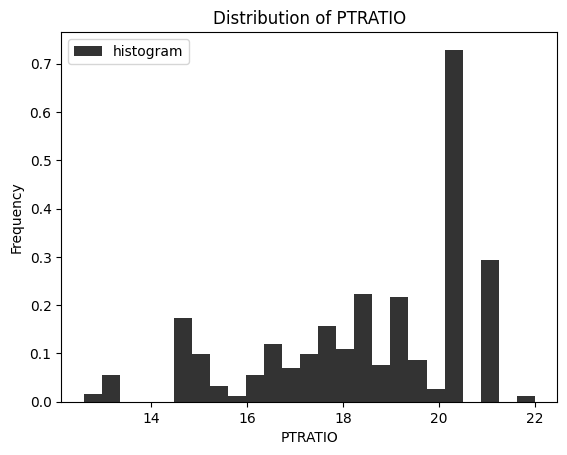

In [2]:
plt.hist(df['PTRATIO'],bins=25,color='black',alpha=0.8,density='true',label='histogram' )
plt.title("Distribution of PTRATIO")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.legend()
plt.show()

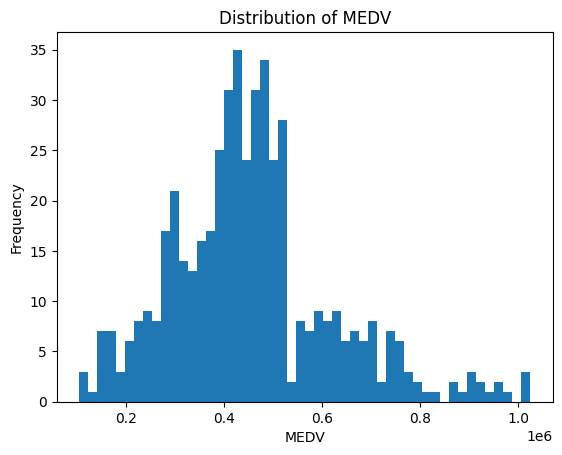

In [3]:
plt.hist(df['MEDV'],bins=50 )
plt.title("Distribution of MEDV")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

In [4]:
print(df.isnull().sum())

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


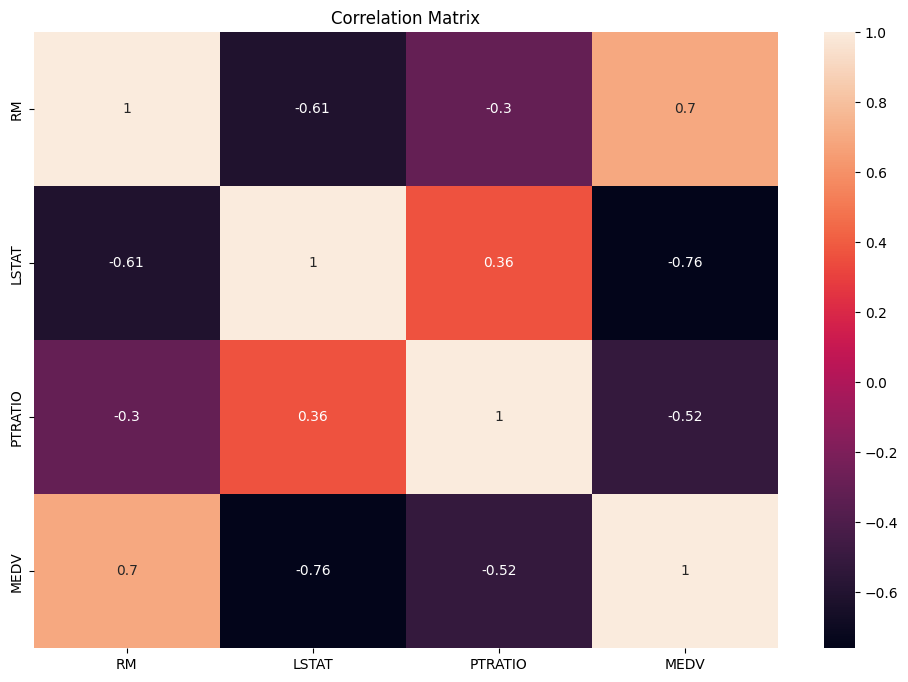

In [5]:
correlation_matrix = df.corr().round(10)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

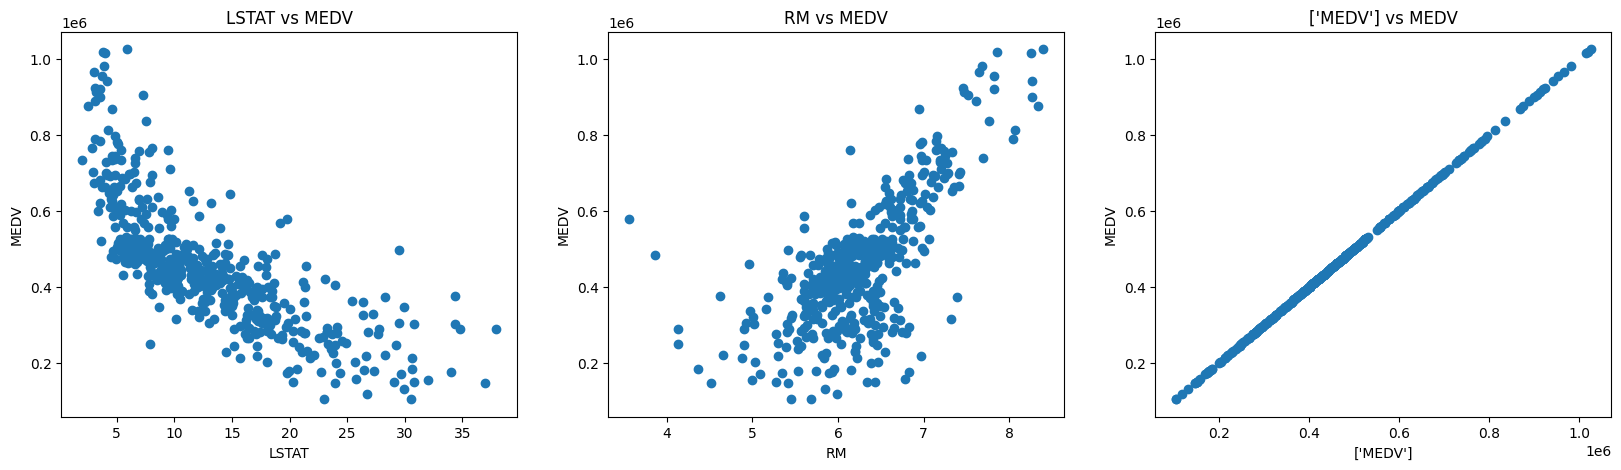

In [6]:
features = ['LSTAT', 'RM',['MEDV']]
target = df['MEDV']
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    plt.scatter(df[col], target, marker='o')
    plt.title(f'{col} vs MEDV')
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import gradio as gr

# Load dataset


# Auto-detect feature and target
target_column = df.columns[-1]  # Assuming last column is the target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
        ]), categorical_cols)
    ]
)

# Final pipeline with linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# Prediction function
def predict_house_price(*args):
    input_df = pd.DataFrame([args], columns=X.columns)
    prediction = pipeline.predict(input_df)[0]
    return f"Predicted Value: ₹{round(prediction, 2)}"

# Create dynamic Gradio inputs
inputs = []
for col in X.columns:
    if col in numerical_cols:
        inputs.append(gr.Number(label=col))
    else:
        options = df[col].dropna().unique().tolist()
        inputs.append(gr.Dropdown(choices=options, label=col))

# Gradio interface
interface = gr.Interface(
    fn=predict_house_price,
    inputs=inputs,
    outputs="text",
    title="🏡 Housing Price Predictor",
    description="Enter details to estimate house price based on the dataset."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://15c26de1f3f54fb39b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
